<a href="https://colab.research.google.com/github/LIAO-JIAN-PENG/python_lecture/blob/main/image2ascii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ./image
!mkdir ./output

# 圖片轉ascii字元圖
所需套件  
* cv2 : 影像處理
* matplolib : 顯示圖片用

# 簡報
https://drive.google.com/file/d/1IUwMMLwKHbRagIJdU8mQx2pWOiu01zv4/view?usp=sharing

# 圖檔
https://drive.google.com/drive/folders/1EdB5CyLjJCXa-JFCTS_Xtq8JtDvr29hj?usp=sharing

In [ ]:
import cv2
import matplotlib.pyplot as plt

## 讀檔操作
* image_path: 圖片的路徑
* image_rgb: 因為opencv是BGR存檔，與平常的RGB的排列不一樣，需要進行轉換  
  
  
* cv2.COLOR_BGR2RGB: 將圖片從BGR轉換成RGB

In [ ]:
# image_path
image_path = 'image/bird.jpg'

try:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
except:
    print('讀檔錯誤')

In [ ]:
# 顯示圖片大小
image.shape

(682, 1023, 3)

## cv2 BGR 顯色

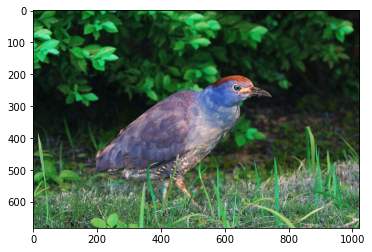

In [ ]:
plt.imshow(image)
plt.show()

## 轉換後 RGB 顯色

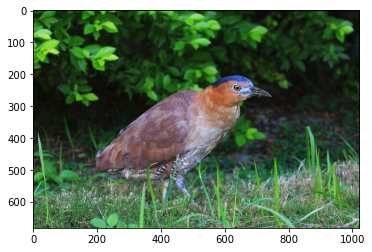

In [ ]:
plt.imshow(image_rgb)
plt.show()

## 灰階畫處理
* 灰階化: gray = (R + G + B) / 3
* cv2.COLOR_BGR2GRAY

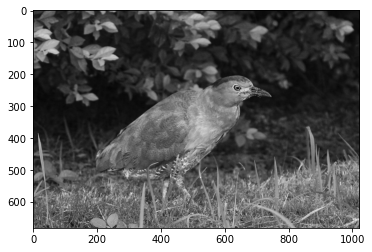

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## 圖片縮放
* resize_rate: 以 1 為原比例，縮放圖片大小
* 因為後面所使用的字元是**半形**所以寬度的比例要放大兩倍
* cv2.resize(灰階圖, (圖寬, 圖高))

In [ ]:
# 縮放參數調整
resize_rate = 0.15

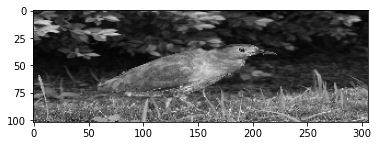

In [ ]:
# 灰階圖的御覽圖(看起來比例有跑掉，但成品會是正常的)
# 適用背景: 白色
resized_image = cv2.resize(gray_image, (int(gray_image.shape[1]*resize_rate)*2, int(gray_image.shape[0]*resize_rate)))
plt.imshow(resized_image, cmap='gray')

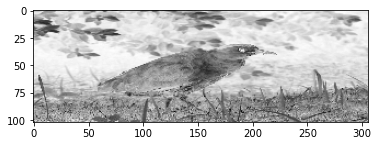

In [ ]:
# 適用背景: 黑色
resized_image = cv2.resize(gray_image, (int(gray_image.shape[1]*resize_rate)*2, int(gray_image.shape[0]*resize_rate)))
plt.imshow(255-resized_image, cmap='gray')

In [ ]:
# 成圖大小
resized_image.shape

(102, 306)

## 灰階圖字串化
* width: 紀錄圖寬，因為後面會連起來，之後要加'\n'的時候要區分
* pixels: 透過reshape的方式將圖型壓成一維的pixels

## 字元深淺
* 亮度深淺由量級 0 ~ 15 : \[' ', '`', '.', ':', '-', '/', '+', 'y', 's', 'h', 'o', 'd', 'm', '#', '@'\]
* 量級對應到 0 ~ 255

In [ ]:
width = resized_image.shape[1]
pixels = resized_image.reshape(resized_image.shape[0]*resized_image.shape[1])
pixels.shape

(31212,)

In [ ]:
# char_image: 生成的字元串
# 用字串串接的方式將字元一個一個接起來
ASCII_CHARS = [' ', '`', '.', ':', '-', '/', '+', 'y', 's', 'h', 'o', 'd', 'm', '#', '@']
char_image = ''
for pixel in pixels:
    char_image += ASCII_CHARS[pixel//17]

In [ ]:
# char_image: 是還未加上換行
# final_image: 使用 width 參數知道何時加上換行
final_image = ''
for i in range(0, len(char_image), width):
    final_image += char_image[i:i+width]
    final_image += '\n'

## 存檔
* 將處理好的字串存成文字檔

In [ ]:
with open('output/bird.txt', 'w') as file:
    file.write(final_image)

## 影片 DEMO
https://www.youtube.com/watch?v=tX2rsnZPxAA&t=3s